# **Lab 1: Introduction to Python libraries for Deep Learning**

**IT22577160 -Nimes R H R**

## **Task -01**

**Import Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set matplotlib to inline for Jupyter
%matplotlib inline

# Set figure quality for better plots
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100


**1.1 Random 4×4 array from an exponential distribution**

In [2]:
exp_array = np.random.exponential(scale=1.0, size=(4, 4))
print("4x4 array from exponential distribution:\n", exp_array)


4x4 array from exponential distribution:
 [[6.27205934 0.24283626 2.69066307 3.02838345]
 [0.3293759  0.07718262 1.05456383 1.60647695]
 [1.38224739 3.26933886 1.92104994 1.59864748]
 [1.07866461 0.341738   1.16599896 1.24442264]]


**1.2 Compare exponential, uniform, and normal distributions**

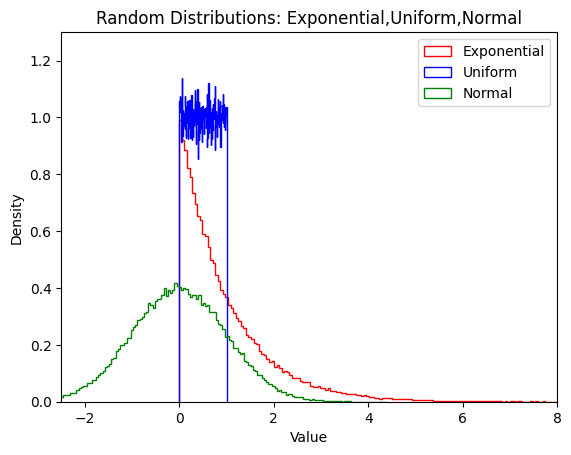

In [3]:
# Create arrays
exp_data = np.random.exponential(scale=1.0, size=100000)   # Exponential
uniform_data = np.random.rand(100000)                          # Uniform [0,1)
normal_data = np.random.randn(100000)                        # Normal N(0,1)

# Plot histograms

plt.hist(exp_data, density=True, bins=200, histtype="step", color="red", label="Exponential")
plt.hist(uniform_data, density=True, bins=200, histtype="step", color="blue", label="Uniform")
plt.hist(normal_data, density=True, bins=200, histtype="step", color="green", label="Normal")

# Better axis limits for visualization
plt.axis([-2.5,8, 0, 1.3])
plt.legend(loc="upper right")
plt.title("Random Distributions: Exponential,Uniform,Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


1.3  3D Plot

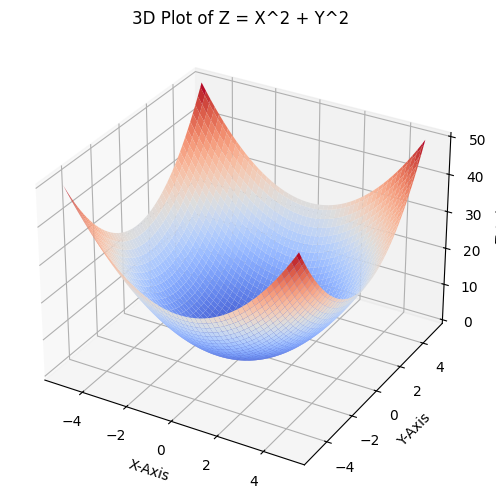

In [4]:
# Create grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Labels
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title("3D Plot of Z = X^2 + Y^2")
plt.show()


**1.4 Pearson & Spearman Correlation Heatmaps**

In [6]:
# Load Pokemon dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')
stats_df = df.drop(['Name', 'Type 1', 'Type 2', 'Total', 'Stage', 'Legendary'], axis=1)

print(f"Pokemon dataset shape: {df.shape}")
print(f"Stats columns: {list(stats_df.columns)}")

Pokemon dataset shape: (151, 12)
Stats columns: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


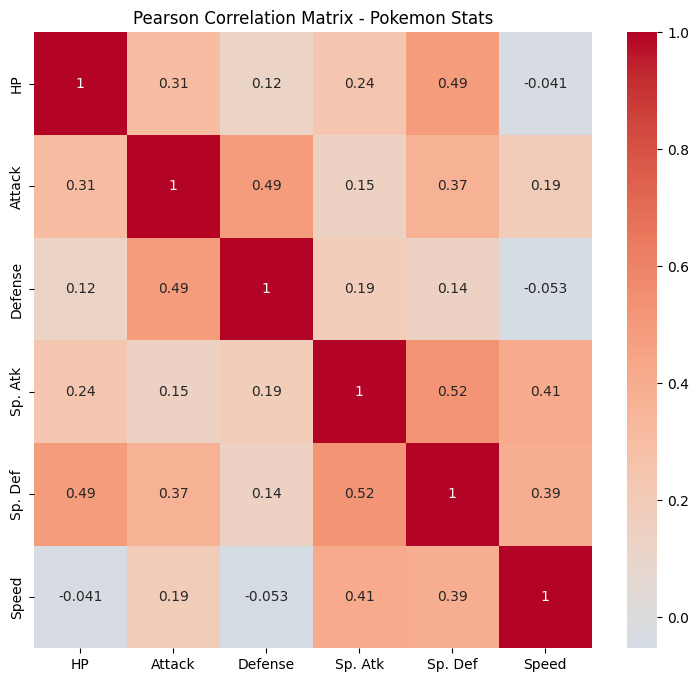

In [7]:
# Pearson Correlation
plt.figure(figsize=(9, 8))
corr = stats_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix - Pokemon Stats')
plt.show()

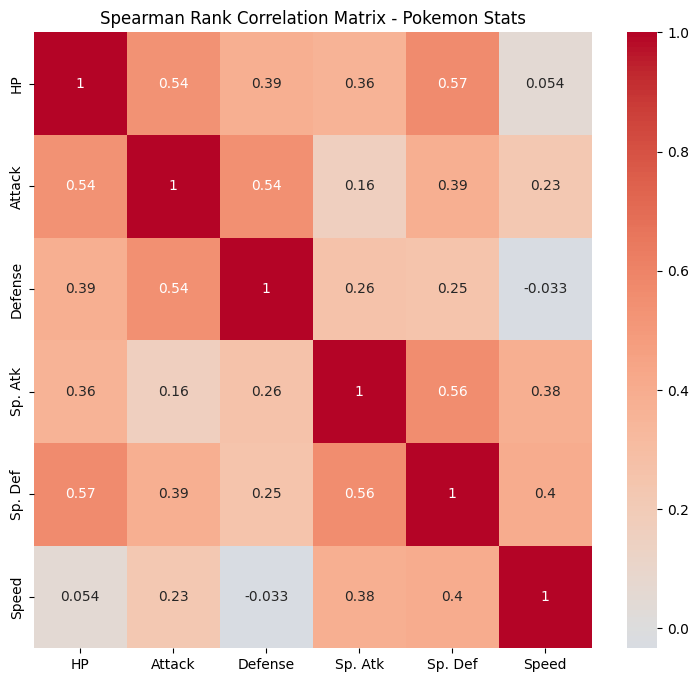

In [9]:
# Spearman Correlation
plt.figure(figsize=(9, 8))
corr_spearman = stats_df.corr(method='spearman')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Rank Correlation Matrix - Pokemon Stats')
plt.show()

## **Task - 02**

**1.1 Load the dataset and filter Columns**

In [10]:
# Step 1: Load Dataset
df = pd.read_csv('Au_nanoparticle_dataset.csv', index_col=0, encoding='latin')

print("Original Dataset Shape:", df.shape)
df.head()


# Step 2: Create new dataframe with only the required columns
cols = ["N_total", "N_bulk", "N_surface", "R_avg"]
new_df = df[cols]
print("Filtered DataFrame Shape:", new_df.shape)
print("Filtered DataFrame Columns:", list(new_df.columns))

Original Dataset Shape: (4000, 184)
Filtered DataFrame Shape: (4000, 4)
Filtered DataFrame Columns: ['N_total', 'N_bulk', 'N_surface', 'R_avg']


**1.2 Display first 20 samples of the dataframe**

In [11]:
print("\nFirst 20 samples:")
print(new_df.head(20))


First 20 samples:
    N_total  N_bulk  N_surface    R_avg
ID                                     
1      1599    1014        585  17.3706
2      1642    1034        608  17.6061
3      4637    3365       1272  25.3692
4      7189    5292       1897  29.7011
5     11004    8508       2496  34.2831
6     13375   10768       2607  36.6334
7     13795   11155       2640  37.0108
8     13947   11304       2643  37.1672
9     14020   11357       2663  37.2103
10    14056   11389       2667  37.2467
11     1534     966        568  17.1107
12     1559     974        585  17.2101
13     4356    3099       1257  24.8253
14     6550    4675       1875  29.0376
15    10175    7748       2427  33.4399
16    12393    9842       2551  35.6950
17    13207   10590       2617  36.4657
18    13543   10937       2606  36.7871
19    13713   11079       2634  36.9333
20    13791   11151       2640  37.0104


**1.3 Calculate statistics**

In [12]:
stats = pd.DataFrame({
    "Mean": new_df.mean(),
    "Std Dev": new_df.std(),
    "25% Quartile": new_df.quantile(0.25),
    "50% Quartile(Median)": new_df.quantile(0.50),
    "75% Quartile": new_df.quantile(0.75)
})

print("\nStatistical Summary:")
print(stats)



Statistical Summary:
                  Mean      Std Dev  25% Quartile  50% Quartile(Median)  \
N_total    3476.786500  3679.286769   1061.000000            1867.00000   
N_bulk     2521.550250  2976.232459    618.750000            1199.00000   
N_surface   955.236250   721.870220    437.000000             666.00000   
R_avg        20.654363     7.610716     15.160725              18.62925   

           75% Quartile  
N_total     4503.000000  
N_bulk      3183.000000  
N_surface   1301.750000  
R_avg         25.525125  


**1.4 Plot histograms in 1x4 layout**

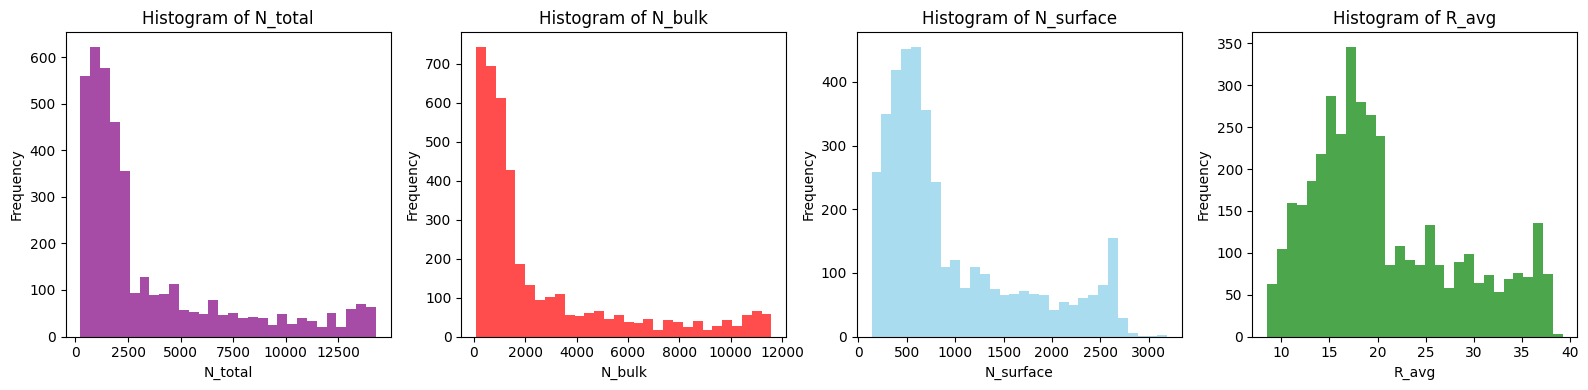

In [13]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.hist(new_df['N_total'], bins=30, color='purple', alpha=0.7)
plt.title('Histogram of N_total')
plt.xlabel('N_total')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
plt.hist(new_df['N_bulk'], bins=30, color='red', alpha=0.7)
plt.title('Histogram of N_bulk')
plt.xlabel('N_bulk')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
plt.hist(new_df['N_surface'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of N_surface')
plt.xlabel('N_surface')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
plt.hist(new_df['R_avg'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of R_avg')
plt.xlabel('R_avg')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**1.5 Pairplot of the dataframe**

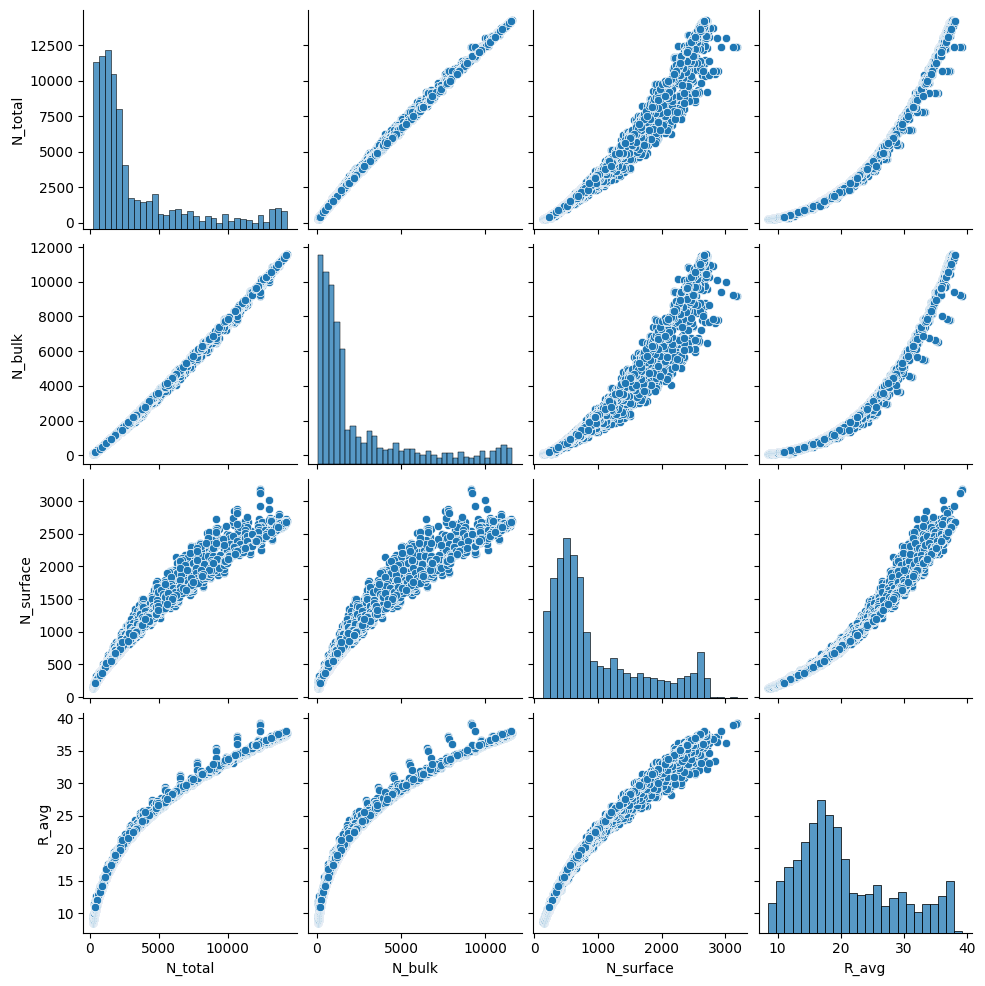

In [14]:
sns.pairplot(new_df)
plt.show()

**1.6 Custom PairGrid with hist + KDE**

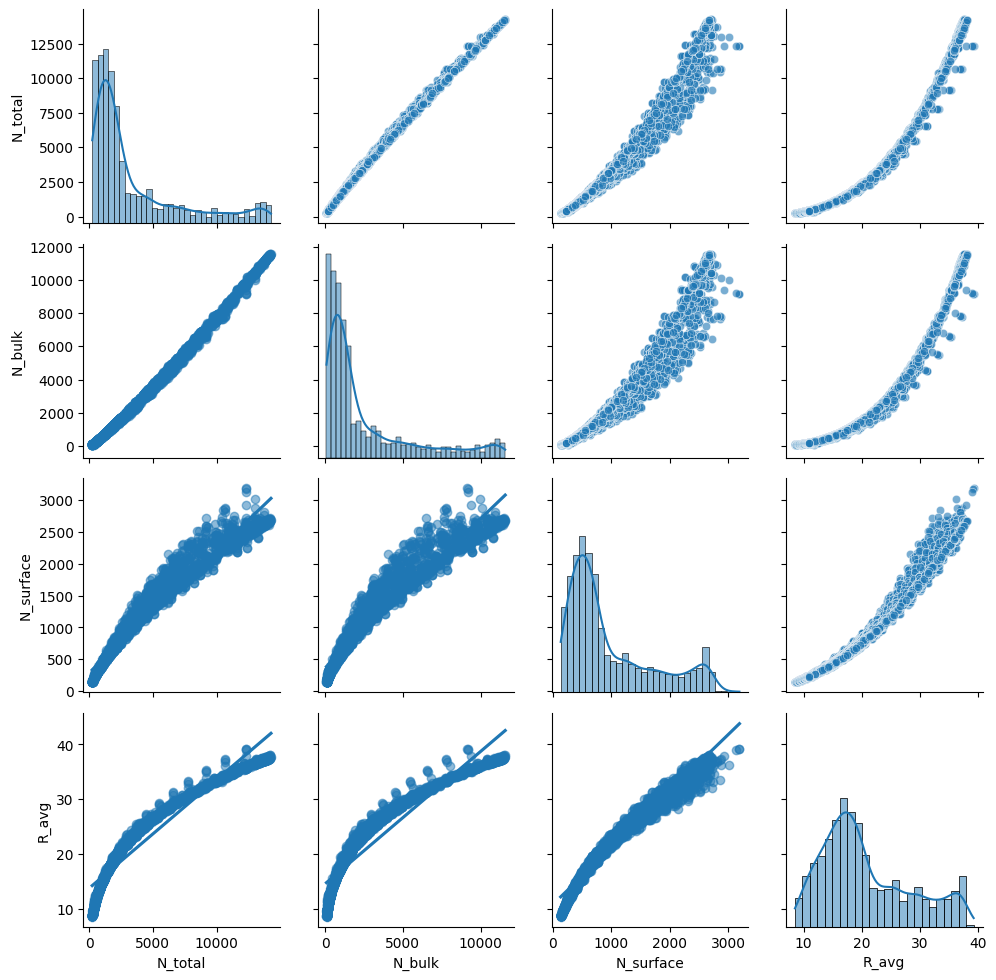

In [15]:
# Improved version with better readability
g = sns.PairGrid(new_df[['N_total', 'N_bulk', 'N_surface', 'R_avg']])

# Upper triangle: scatter plots (more readable)
g.map_upper(sns.scatterplot, alpha=0.6)

# Diagonal: histogram + KDE
g.map_diag(sns.histplot, kde=True)

# Lower triangle: regression plots
g.map_lower(sns.regplot, scatter_kws={'alpha':0.5})

plt.show()
plt.show()

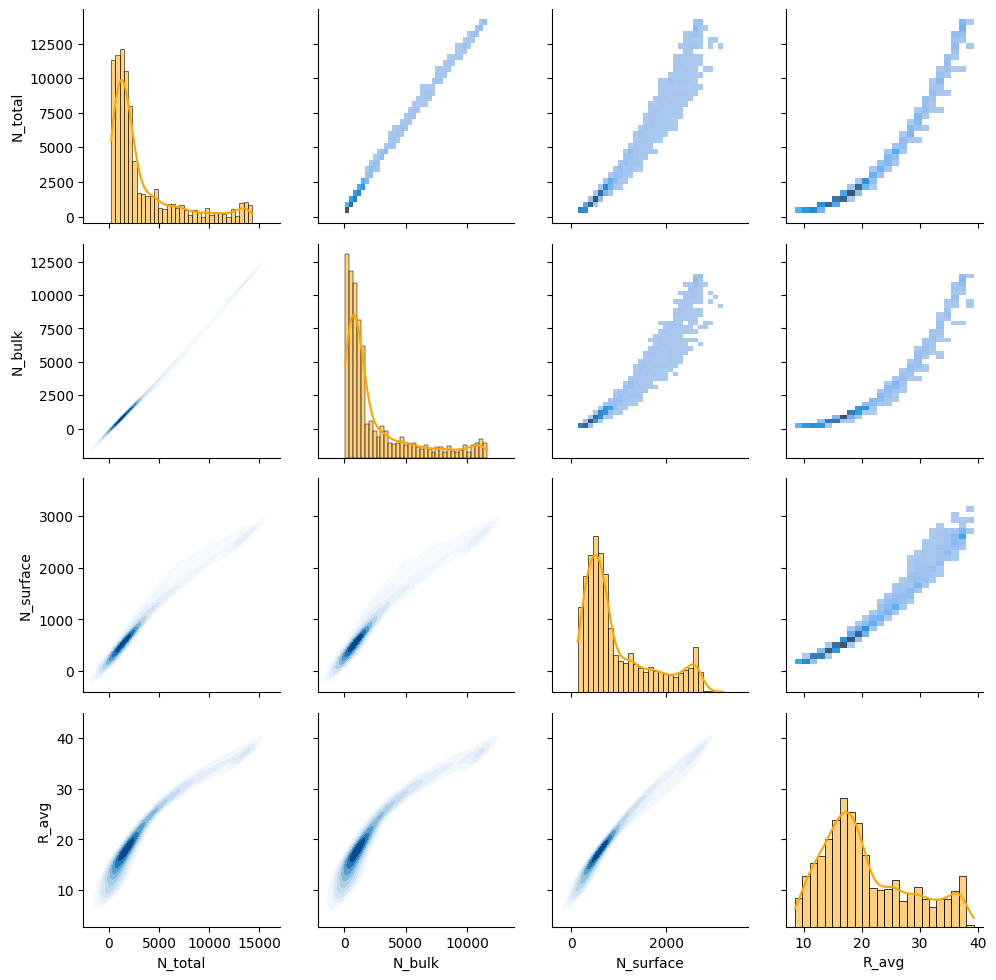

In [16]:
g = sns.PairGrid(new_df)

# Upper: Bivariate histogram
g.map_upper(sns.histplot)

# Diagonal: Histogram + KDE
g.map_diag(sns.histplot, kde=True, color="orange")

# Lower: Bivariate KDE plot
g.map_lower(sns.kdeplot, fill=True, cmap="Blues")

plt.show()

**Completion of the Lab-01!!**